In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import utils, datasets, transforms

from PIL import Image
import urllib.request as request
import matplotlib.pyplot as plt

# **Construyendo un modelo**

---



In [0]:
data_path = 'data/'
full_data_set = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.Compose([
                                                                  transforms.ToTensor(),
                                                                  transforms.Normalize((0.4915, 0.4823, 0.4468),(0.2470, 0.2435, 0.2616))
]))

full_validation_set = datasets.CIFAR10(data_path, train=False, download=True, transform=transforms.Compose([
                                                                  transforms.ToTensor(),
                                                                  transforms.Normalize((0.4915, 0.4823, 0.4468),(0.2470, 0.2435, 0.2616))
]))

Files already downloaded and verified
Files already downloaded and verified


In [0]:
size = 4
data_loader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

In [0]:
data_iterator = iter(data_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


truck
truck
frog
bird


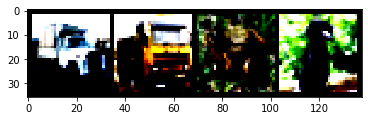

In [0]:
imgs, labels = data_iterator.next()

classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

plt.imshow(utils.make_grid(imgs).permute(1, 2, 0)) #Muestra la imagen en grilla

for i in range(size):
  print(classes[labels[i]]) #imprime el nombre de las etiquetas en el batch actual

In [0]:
class_names = ['car', 'cat']
label_map = {1:0, 3:1}

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1, 3]]

In [0]:
img, label = data_set[1234]
img.shape, label

(torch.Size([3, 32, 32]), 0)

In [0]:
# Modelo
model = nn.Sequential(
    nn.Linear(3 * 32 * 32, 512),
    nn.Tanh(),
    nn.Linear(512, 2)
)

In [0]:
# Softmax function
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

In [0]:
x = torch.tensor([1.0, 2.0, 3.0])
softmax(x).sum()

tensor(1.)

In [0]:
# Modelo con softmax
model = nn.Sequential(
    nn.Linear(3 * 32 * 32, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

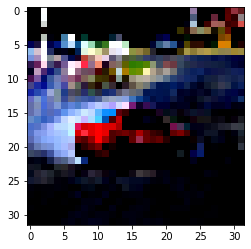

In [0]:
img, label = data_set[20]
plt.imshow(img.permute(1, 2, 0))

class_names[label]

In [0]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.4097, 0.5903]], grad_fn=<SoftmaxBackward>)

In [0]:
_, index = torch.max(out, dim=1)
print('->', class_names[label], ' Model:', class_names[index])

-> car  Model: cat


# **Implementando un clasificador totalmente conectado**

---



In [0]:
# Model with Log Softmax
model = nn.Sequential(
    nn.Linear(32 * 32 * 3, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
)
loss_function = nn.NLLLoss()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

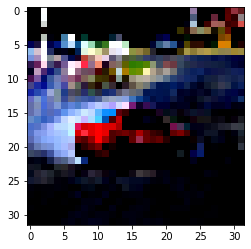

In [0]:
img, label = data_set[20]
plt.imshow(img.permute(1, 2, 0))

class_names[label]

In [0]:
out = model(img.view(-1).unsqueeze(0))
print(out)

_, index = torch.max(out, dim=1)
print('->', class_names[label], ' Model:', class_names[index])

tensor([[-0.6820, -0.7044]], grad_fn=<LogSoftmaxBackward>)
-> car  Model: car


In [0]:
model = nn.Sequential(
    nn.Linear(32 * 32 * 3, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
) # Last model
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

n_epochs = 5 # Iteraciones

# Training
for epoch in range(n_epochs):
  for img, label in data_set:
    out = model(img.view(-1).unsqueeze(0))
    loss = loss_function(out, torch.tensor([label]))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print('Epoch: {}, Loss:{}'.format(epoch, float(loss)))


Epoch: 0, Loss:0.001050040009431541
Epoch: 1, Loss:0.006953682750463486
Epoch: 2, Loss:0.04678585007786751
Epoch: 3, Loss:0.3917507231235504
Epoch: 4, Loss:6.089066028594971


In [0]:
# Usa DataLoader para hacer mas rapido el entrenamiento
train_loader= torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(32 * 32 * 3, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1)
) # Last model
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

n_epochs = 100 # Iteraciones

# Training
for epoch in range(n_epochs):
  for img, label in train_loader:
    out = model(img.view(img.shape[0], -1))
    loss = loss_function(out, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print('Epoch: {}, Loss:{}'.format(epoch, float(loss)))


Epoch: 0, Loss:0.30932873487472534
Epoch: 1, Loss:0.4098937511444092
Epoch: 2, Loss:0.2752927541732788
Epoch: 3, Loss:0.5303469896316528
Epoch: 4, Loss:0.33092740178108215
Epoch: 5, Loss:0.2980993390083313
Epoch: 6, Loss:0.42722833156585693
Epoch: 7, Loss:0.43497875332832336
Epoch: 8, Loss:0.17621245980262756
Epoch: 9, Loss:0.30256474018096924
Epoch: 10, Loss:0.24510641396045685
Epoch: 11, Loss:0.2362159788608551
Epoch: 12, Loss:0.15185938775539398
Epoch: 13, Loss:0.36662521958351135
Epoch: 14, Loss:0.14473170042037964
Epoch: 15, Loss:0.20841947197914124
Epoch: 16, Loss:0.2535763084888458
Epoch: 17, Loss:0.24845129251480103
Epoch: 18, Loss:0.1442098170518875
Epoch: 19, Loss:0.08082128316164017
Epoch: 20, Loss:0.2101898044347763
Epoch: 21, Loss:0.23310373723506927
Epoch: 22, Loss:0.10892468690872192
Epoch: 23, Loss:0.057365432381629944
Epoch: 24, Loss:0.5519776344299316
Epoch: 25, Loss:0.13330385088920593
Epoch: 26, Loss:0.05027268826961517
Epoch: 27, Loss:0.049759525805711746
Epoch: 28

In [0]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = -0

with torch.no_grad():
  for imgs, labels in val_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]

    correct += int((predicted == labels).sum())

print('Correct:', correct, 'Total:', total)
print('Accuracy:', correct/total)

Correct: 1741 Total: 2000
Accuracy: 0.8705


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


->:  car  model: car


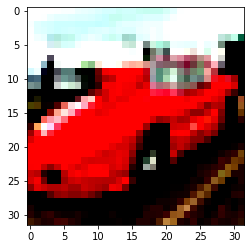

In [0]:
img, label = validation_set[20]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('->: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

# **Mejoras, limitaciones y conclusiones**

---



In [0]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

optimizer = optim.SGD(model.parameters(), lr=0.01)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: {}, Loss: {}".format(epoch, float(loss)))

Epoch: 0, Loss: 0.4991365671157837
Epoch: 1, Loss: 0.3955062925815582
Epoch: 2, Loss: 0.45206359028816223
Epoch: 3, Loss: 0.2042885571718216
Epoch: 4, Loss: 0.2839258313179016
Epoch: 5, Loss: 0.30679506063461304
Epoch: 6, Loss: 0.31786638498306274
Epoch: 7, Loss: 0.2815028727054596
Epoch: 8, Loss: 0.18630477786064148
Epoch: 9, Loss: 0.5357047319412231
Epoch: 10, Loss: 0.22224998474121094
Epoch: 11, Loss: 0.2289549857378006
Epoch: 12, Loss: 0.307110995054245
Epoch: 13, Loss: 0.3317302167415619
Epoch: 14, Loss: 0.2092413306236267
Epoch: 15, Loss: 0.3120642602443695
Epoch: 16, Loss: 0.2862047851085663
Epoch: 17, Loss: 0.29699981212615967
Epoch: 18, Loss: 0.07151670008897781
Epoch: 19, Loss: 0.1784643977880478
Epoch: 20, Loss: 0.3939531445503235
Epoch: 21, Loss: 0.33506688475608826
Epoch: 22, Loss: 0.11235979199409485
Epoch: 23, Loss: 0.10486077517271042
Epoch: 24, Loss: 0.07082542777061462
Epoch: 25, Loss: 0.02770421653985977
Epoch: 26, Loss: 0.28067174553871155
Epoch: 27, Loss: 0.0554573

In [0]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
        
print('Correct:', correct, "Total:", total)
print("Accuracy: {}".format(correct / total))

Correct: 1715 Total: 2000
Accuracy: 0.8575


In [0]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
        
print('Correct:', correct, "Total:", total)
print("Accuracy: {}".format(correct / total))

Correct: 10000 Total: 10000
Accuracy: 1.0


In [0]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737474

In [0]:
[p.numel() for p in model.parameters() if p.requires_grad == True]

[3145728, 1024, 524288, 512, 65536, 128, 256, 2]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


correct: car   model: cat


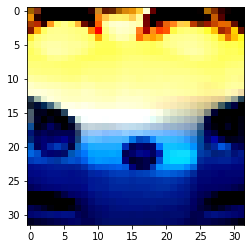

In [0]:
image = request.urlretrieve('https://i.pinimg.com/originals/43/bc/47/43bc47066bb8b2fa4fe7cc8e82cc3714.jpg','test,jpg')
                            
img = Image.open(image[0])

preprocess = transforms.Compose([
        transforms.Resize(48),
        transforms.CenterCrop(32),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4915, 0.4823, 0.4468],
            std=[0.2470, 0.2435, 0.2616]
        )])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
print('correct: car ',' model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))